# Assignment Week 12
William Hanlim / BM2020 / 23102010093

## A
1. Bagaimana cara kerja Neural Network?

Neural Network akan menerima input data dan melakukan perhitungan melalui hidden layer neuron untuk menghasilkan output. Setiap node memiliki bobot berbeda yang disesuaikan pada saat training. Bobot-bobot ini merupakan informasi yang akan digunakan untuk membuat prediksi atau forecasting.

2. Jelaskan cara kerja RNN

RNN menggunakan squence data secara iterative dengan memilih n jumlah data, dan bergeser satu data setiap iterasinya. RNN menggunakan n data terakhir untuk meprediksi satu periode kedepan.

3. Apa perbedaan RNN biasa dengan LSTM? Apa persamaannya?

RNN dan LSTM sama-sama digunakan terhadap suqeunce data. Namun LSTM dibuat khusus untuk menghadapi masalah forgetting pada RNN. Pada LSTM ada yang disebut gate yang dapat diatur untuk melakukan adjustment pada signifikansi sebuah informasi. RNN tidak memiliki kemampuan untuk melakukan hal ini.

4. Bagaimana proses “forget” pada LSTM?

Forgetting dilakukan melalui forget yang dapat mengatur informasi apa saja yang akan dilupakan. Dengan ini, LSTM dapat mengatur informasi apa saja yang bisa dilupakan dan informasi apa yang perlu diingat.

5. Bagaimana proses “remember” pada LSTM?

Untuk melakukan 'remember', informasi akan melalui input dan output gate. Pada gate ini, jumlah informasi yang akan digunakan diatur dan dikirim pada output gate. Hal ini membuat LSTM dapat memilih informasi untuk dipertahankan dan digunakan untuk membuat prediksi.

## B

1. Jelaskan secara singkat apa yang terjadi pada program ini.

Pada program ini dilakukan random data generation menggunakan persamaan y=mx+b+noise data. Data akan tersebar secara linear pada garis y=mx+b namun akan ada randomness sesuai dengan nilai d. Disini, neural network dengan satu hidden layer digunakan untuk membuat prediksi linear terhadap data originial yang dibuat.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [3]:
m = 2
b = 3
d = 2
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [4]:
y = m*x + b + d*noise

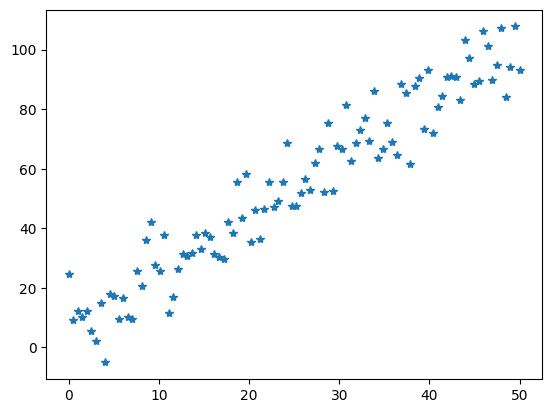

In [5]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(x, y, epochs=125, verbose=1)

Epoch 1/125
4/4 [==============================] - 2s 17ms/step - loss: 1882.5228
Epoch 2/125
4/4 [==============================] - 0s 6ms/step - loss: 1816.3990
Epoch 3/125
4/4 [==============================] - 0s 7ms/step - loss: 1755.6685
Epoch 4/125
4/4 [==============================] - 0s 6ms/step - loss: 1695.3789
Epoch 5/125
4/4 [==============================] - 0s 6ms/step - loss: 1639.0387
Epoch 6/125
4/4 [==============================] - 0s 7ms/step - loss: 1581.3242
Epoch 7/125
4/4 [==============================] - 0s 4ms/step - loss: 1538.9717
Epoch 8/125
4/4 [==============================] - 0s 5ms/step - loss: 1498.7761
Epoch 9/125
4/4 [==============================] - 0s 5ms/step - loss: 1457.7378
Epoch 10/125
4/4 [==============================] - 0s 5ms/step - loss: 1417.6982
Epoch 11/125
4/4 [==============================] - 0s 5ms/step - loss: 1375.4514
Epoch 12/125
4/4 [==============================] - 0s 8ms/step - loss: 1334.0524
Epoch 13/125
4/4 [======

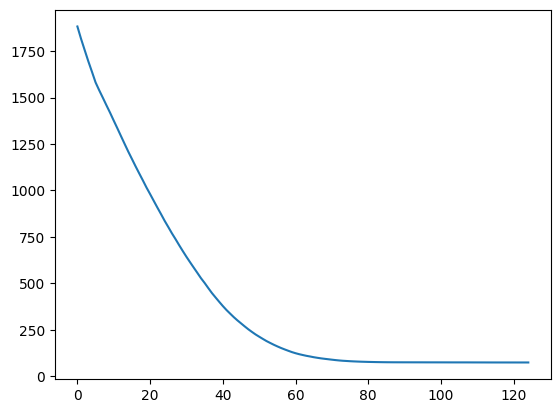

In [10]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [11]:
x_for_predictions = np.linspace(0,50,1000)

In [12]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 4ms/step


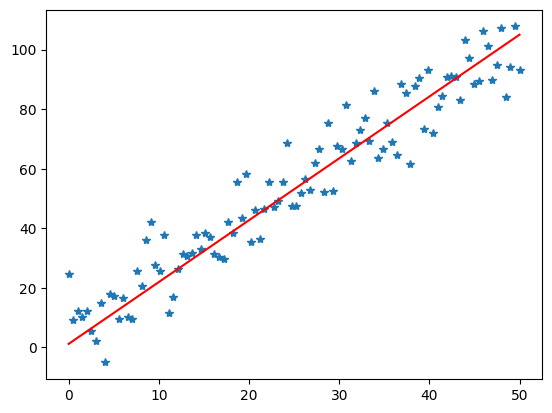

In [13]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 5ms/step


In [16]:
mean_squared_error(y,prediction_for_true_y)

73.56328042381902

In [17]:
mean_absolute_error(y,prediction_for_true_y)

6.9662725870514945

In [64]:
from keras import backend as K

# Do some code, e.g. train and save model

K.clear_session()

In [65]:
del model

### 2. Ubahlah nilai-nilai d = 0.1, 1.0, 2.5. Jelaskan hasilnya.

### d = 0.1

In [76]:
m = 2
b = 3
d = 0.1
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [77]:
y = m*x + b + d*noise

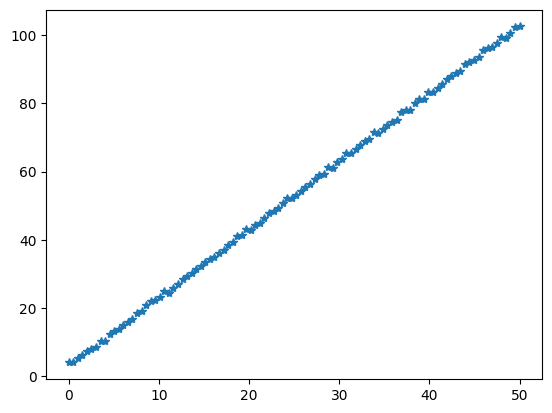

In [78]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [79]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 8         
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
model.fit(x, y, epochs=125, verbose=1)

Epoch 1/125
4/4 [==============================] - 0s 3ms/step - loss: 44.0069
Epoch 2/125
4/4 [==============================] - 0s 4ms/step - loss: 38.8588
Epoch 3/125
4/4 [==============================] - 0s 3ms/step - loss: 34.0213
Epoch 4/125
4/4 [==============================] - 0s 4ms/step - loss: 29.6813
Epoch 5/125
4/4 [==============================] - 0s 4ms/step - loss: 25.8308
Epoch 6/125
4/4 [==============================] - 0s 4ms/step - loss: 22.4077
Epoch 7/125
4/4 [==============================] - 0s 4ms/step - loss: 19.6089
Epoch 8/125
4/4 [==============================] - 0s 3ms/step - loss: 16.9980
Epoch 9/125
4/4 [==============================] - 0s 4ms/step - loss: 14.7758
Epoch 10/125
4/4 [==============================] - 0s 4ms/step - loss: 12.8620
Epoch 11/125
4/4 [==============================] - 0s 3ms/step - loss: 11.1405
Epoch 12/125
4/4 [==============================] - 0s 3ms/step - loss: 9.6411
Epoch 13/125
4/4 [==============================] 

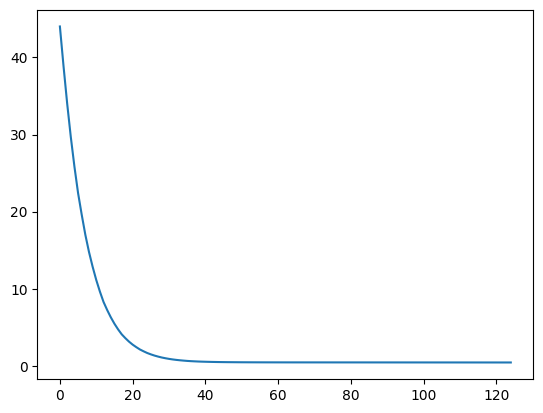

In [88]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [89]:
x_for_predictions = np.linspace(0,50,1000)

In [90]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 2ms/step


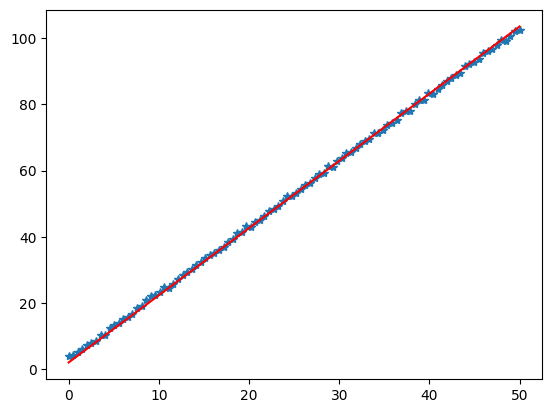

In [91]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

In [92]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 3ms/step


In [93]:
mean_squared_error(y,prediction_for_true_y)

0.4461864996660944

In [94]:
mean_absolute_error(y,prediction_for_true_y)

0.5349172488302236

In [95]:
K.clear_session()

In [96]:
del model

### d = 1.0

In [35]:
m = 2
b = 3
d = 1.0
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [36]:
y = m*x + b + d*noise

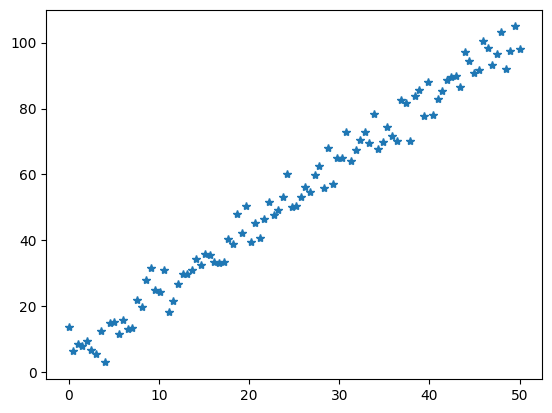

In [37]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [38]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(x, y, epochs=125, verbose=1)

Epoch 1/125
4/4 [==============================] - 1s 5ms/step - loss: 4546.5210
Epoch 2/125
4/4 [==============================] - 0s 3ms/step - loss: 4477.7739
Epoch 3/125
4/4 [==============================] - 0s 3ms/step - loss: 4411.4644
Epoch 4/125
4/4 [==============================] - 0s 3ms/step - loss: 4345.0283
Epoch 5/125
4/4 [==============================] - 0s 3ms/step - loss: 4281.8867
Epoch 6/125
4/4 [==============================] - 0s 3ms/step - loss: 4221.9678
Epoch 7/125
4/4 [==============================] - 0s 3ms/step - loss: 4162.9980
Epoch 8/125
4/4 [==============================] - 0s 5ms/step - loss: 4106.1089
Epoch 9/125
4/4 [==============================] - 0s 3ms/step - loss: 4049.5269
Epoch 10/125
4/4 [==============================] - 0s 3ms/step - loss: 3992.7532
Epoch 11/125
4/4 [==============================] - 0s 3ms/step - loss: 3937.4587
Epoch 12/125
4/4 [==============================] - 0s 3ms/step - loss: 3880.8049
Epoch 13/125
4/4 [=======

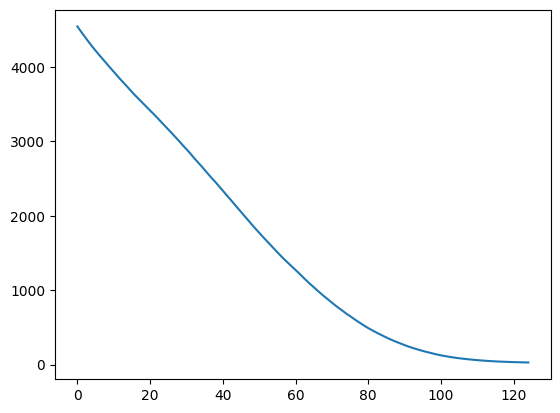

In [41]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [42]:
x_for_predictions = np.linspace(0,50,1000)

In [43]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 2ms/step


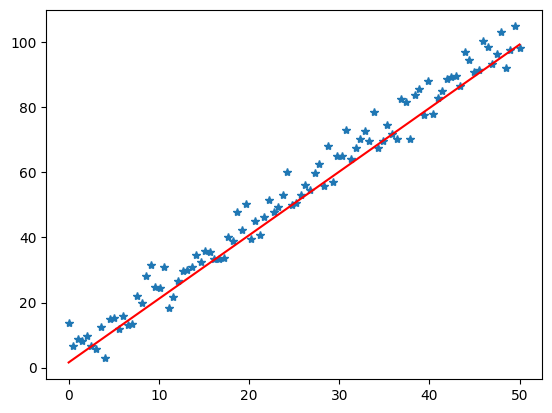

In [44]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

In [45]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 4ms/step


In [46]:
mean_squared_error(y,prediction_for_true_y)

27.13102605756777

In [47]:
mean_absolute_error(y,prediction_for_true_y)

4.163003544259036

In [48]:
K.clear_session()

In [49]:
del model

### d = 2.5

In [50]:
m = 2
b = 3
d = 2.5
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101)
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [51]:
y = m*x + b + d*noise

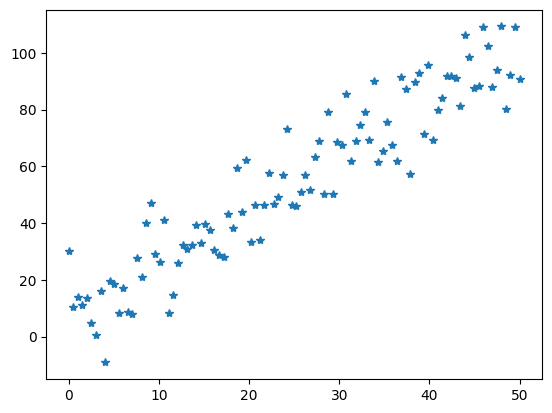

In [52]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [53]:
model = Sequential()

model.add(Dense(4, input_dim=1, activation='relu'))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.fit(x, y, epochs=125, verbose=1)

Epoch 1/125
4/4 [==============================] - 1s 5ms/step - loss: 2409.0210
Epoch 2/125
4/4 [==============================] - 0s 3ms/step - loss: 2349.1909
Epoch 3/125
4/4 [==============================] - 0s 3ms/step - loss: 2287.8296
Epoch 4/125
4/4 [==============================] - 0s 3ms/step - loss: 2227.7063
Epoch 5/125
4/4 [==============================] - 0s 3ms/step - loss: 2170.2129
Epoch 6/125
4/4 [==============================] - 0s 3ms/step - loss: 2111.0671
Epoch 7/125
4/4 [==============================] - 0s 3ms/step - loss: 2054.2275
Epoch 8/125
4/4 [==============================] - 0s 3ms/step - loss: 1999.3188
Epoch 9/125
4/4 [==============================] - 0s 3ms/step - loss: 1944.7048
Epoch 10/125
4/4 [==============================] - 0s 3ms/step - loss: 1889.8149
Epoch 11/125
4/4 [==============================] - 0s 3ms/step - loss: 1836.1793
Epoch 12/125
4/4 [==============================] - 0s 3ms/step - loss: 1783.0997
Epoch 13/125
4/4 [=======

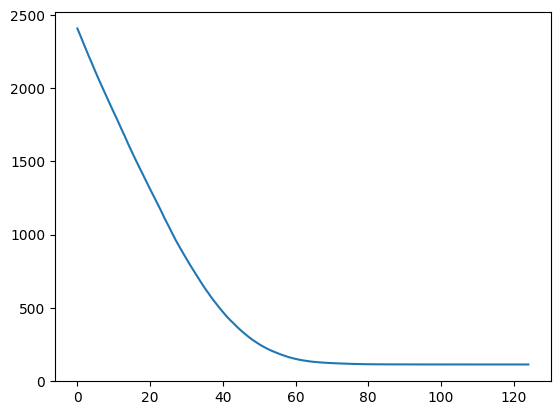

In [56]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [57]:
x_for_predictions = np.linspace(0,50,1000)

In [58]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 2ms/step


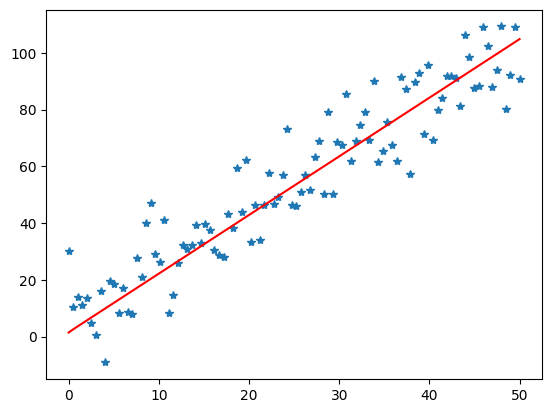

In [59]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

In [60]:
# Labels we do know
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 3ms/step


In [61]:
mean_squared_error(y,prediction_for_true_y)

112.58500679461406

In [62]:
mean_absolute_error(y,prediction_for_true_y)

8.631854186708528

d=0.1 mendapatkan hasil MSE: 0.446 dan MAE: 0.535

d=1.0 mendapatkan hasil MSE: 27.131 dan MAE: 4.163

d=2.5 mendapatkan hasil MSE: 112.585 dan MAE: 8.632

In [137]:
K.clear_session()

In [138]:
del model

## C Gunakan dataset ‘EnergyProduction.csv’
1. Analisa dengan menggunakan LSTM. Jelaskan hasilnya.

In [104]:
df = pd.read_csv('/content/drive/MyDrive/DADS Meeting 12/EnergyProduction.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
df

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321
...,...
1989-08-01,75.2704
1989-09-01,69.5107
1989-10-01,66.0620


In [105]:
df.columns = ['EnergyIndex']

<Axes: xlabel='DATE'>

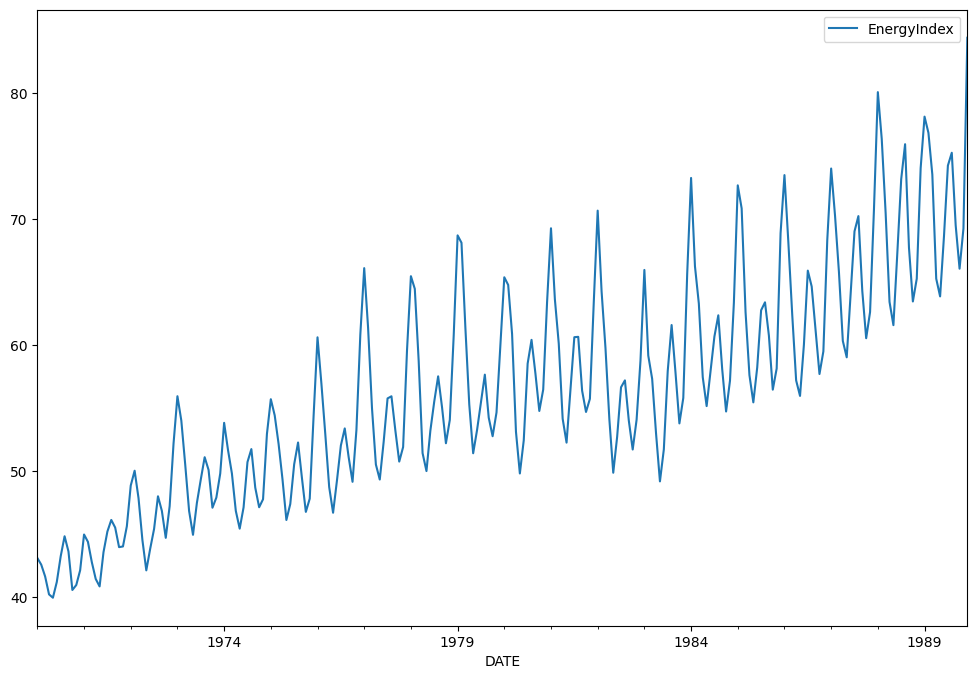

In [106]:
df.plot(figsize=(12,8))

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose

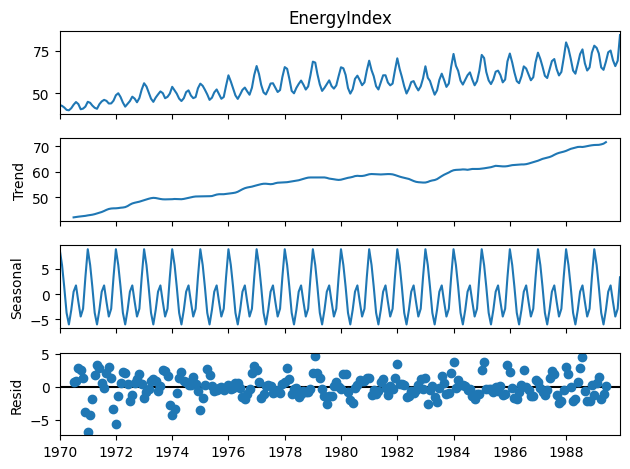

In [109]:
results = seasonal_decompose(df['EnergyIndex'])
results.plot();

## Train Test Split

In [110]:
len(df)

240

In [117]:
240-12

228

In [118]:
train = df.iloc[:228]
test = df.iloc[228:]

In [120]:
len(test)

12

### Scale data

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler = MinMaxScaler()

In [123]:
# WE ONLY FIT TO TRAINING DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [124]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [125]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [126]:
scaled_train

array([[0.07857299],
       [0.06539282],
       [0.04207595],
       [0.00662745],
       [0.        ],
       [0.03119708],
       [0.08196268],
       [0.12158292],
       [0.09136962],
       [0.01530714],
       [0.02506525],
       [0.0542848 ],
       [0.12501743],
       [0.11051974],
       [0.07030176],
       [0.0371421 ],
       [0.02235052],
       [0.09007701],
       [0.13089273],
       [0.15384347],
       [0.13879784],
       [0.10005928],
       [0.10138925],
       [0.14129839],
       [0.22183895],
       [0.25122537],
       [0.19700532],
       [0.11408376],
       [0.05414533],
       [0.09687382],
       [0.13609307],
       [0.20066648],
       [0.17178067],
       [0.11845474],
       [0.18096097],
       [0.30494481],
       [0.398546  ],
       [0.35030833],
       [0.26345663],
       [0.17152912],
       [0.12444709],
       [0.1874614 ],
       [0.23373399],
       [0.27792196],
       [0.25280689],
       [0.17800962],
       [0.19802148],
       [0.245

In [127]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [128]:
len(scaled_train)

228

In [129]:
len(generator) # n_input = 2

226

In [130]:
X,y = generator[0]

In [131]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07857299 0.06539282]
Predict this y: 
 [[0.04207595]]


In [132]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [133]:
# What does the first batch look like?
X,y = generator[0]

In [134]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07857299 0.06539282 0.04207595 0.00662745 0.         0.03119708
 0.08196268 0.12158292 0.09136962 0.01530714 0.02506525 0.0542848 ]
Predict this y: 
 [[0.12501743]]


### Model

In [214]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [215]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [216]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25


<ipython-input-217-b02c32e9fbc0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=25)


216/216 [==============================] - 3s 8ms/step - loss: 0.0259
Epoch 2/25
216/216 [==============================] - 2s 8ms/step - loss: 0.0177
Epoch 3/25
216/216 [==============================] - 2s 8ms/step - loss: 0.0148
Epoch 4/25
216/216 [==============================] - 3s 13ms/step - loss: 0.0121
Epoch 5/25
216/216 [==============================] - 3s 12ms/step - loss: 0.0090
Epoch 6/25
216/216 [==============================] - 2s 9ms/step - loss: 0.0078
Epoch 7/25
216/216 [==============================] - 2s 10ms/step - loss: 0.0059
Epoch 8/25
216/216 [==============================] - 3s 14ms/step - loss: 0.0058
Epoch 9/25
216/216 [==============================] - 3s 14ms/step - loss: 0.0043
Epoch 10/25
216/216 [==============================] - 2s 10ms/step - loss: 0.0042
Epoch 11/25
216/216 [==============================] - 2s 8ms/step - loss: 0.0048
Epoch 12/25
216/216 [==============================] - 3s 16ms/step - loss: 0.0051
Epoch 13/25
216/216 [========

In [218]:
model.history.history.keys()

dict_keys(['loss'])

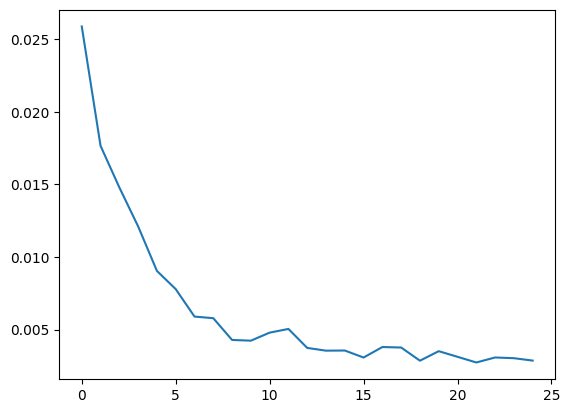

In [219]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test data

In [220]:
first_eval_batch = scaled_train[-12:]

In [221]:
first_eval_batch

array([[1.        ],
       [0.90734524],
       [0.76120514],
       [0.58509584],
       [0.5390997 ],
       [0.68097591],
       [0.82775857],
       [0.89700432],
       [0.69213872],
       [0.58596256],
       [0.63107703],
       [0.84971558]])

In [222]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [223]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 184ms/step


array([[1.0742776]], dtype=float32)

In [224]:
scaled_test[0]

array([0.95152075])

In [225]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [226]:
current_batch.shape

(1, 12, 1)

In [227]:
current_batch

array([[[1.        ],
        [0.90734524],
        [0.76120514],
        [0.58509584],
        [0.5390997 ],
        [0.68097591],
        [0.82775857],
        [0.89700432],
        [0.69213872],
        [0.58596256],
        [0.63107703],
        [0.84971558]]])

In [228]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.90734524],
        [ 0.76120514],
        [ 0.58509584],
        [ 0.5390997 ],
        [ 0.68097591],
        [ 0.82775857],
        [ 0.89700432],
        [ 0.69213872],
        [ 0.58596256],
        [ 0.63107703],
        [ 0.84971558],
        [99.        ]]])

In [229]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [230]:
test_predictions

[array([1.0742776], dtype=float32),
 array([1.0195752], dtype=float32),
 array([0.80562794], dtype=float32),
 array([0.6263317], dtype=float32),
 array([0.5913807], dtype=float32),
 array([0.7139863], dtype=float32),
 array([0.8768432], dtype=float32),
 array([0.91885066], dtype=float32),
 array([0.77550006], dtype=float32),
 array([0.6462201], dtype=float32),
 array([0.6958151], dtype=float32),
 array([0.91431], dtype=float32)]

In [231]:
scaled_test

array([[0.95152075],
       [0.91946941],
       [0.83697623],
       [0.63100231],
       [0.59598717],
       [0.71546056],
       [0.85469426],
       [0.88013061],
       [0.73668035],
       [0.65078752],
       [0.73032437],
       [1.10761073]])

In [232]:
true_predictions = scaler.inverse_transform(test_predictions)

In [233]:
true_predictions

array([[83.06563635],
       [80.86926931],
       [72.27902863],
       [65.08006883],
       [63.67674538],
       [68.59950583],
       [75.13840726],
       [76.82505663],
       [71.06935797],
       [65.878612  ],
       [67.8699107 ],
       [76.64274281]])

In [234]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,83.186737
1989-02-01,76.8499,80.677770
1989-03-01,73.5377,73.087118
1989-04-01,65.2676,66.638048
1989-05-01,63.8617,63.893717
1989-06-01,68.6587,68.576907
1989-07-01,74.2491,75.799485
1989-08-01,75.2704,77.331560
1989-09-01,69.5107,72.321505


In [235]:
test['Predictions'] = true_predictions

<ipython-input-235-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [236]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,83.065636
1989-02-01,76.8499,80.869269
1989-03-01,73.5377,72.279029
1989-04-01,65.2676,65.080069
1989-05-01,63.8617,63.676745
1989-06-01,68.6587,68.599506
1989-07-01,74.2491,75.138407
1989-08-01,75.2704,76.825057
1989-09-01,69.5107,71.069358


<Axes: xlabel='DATE'>

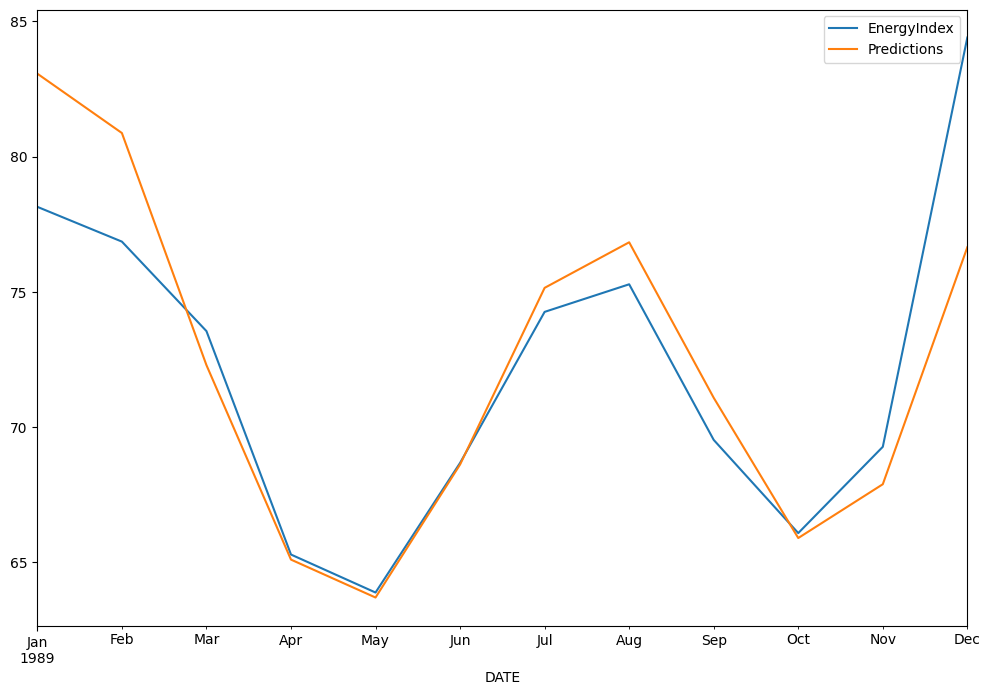

In [237]:
test.plot(figsize=(12,8))

In [238]:
x1 = test['EnergyIndex'].to_numpy()

In [239]:
x2 = test['Predictions'].to_numpy()

In [240]:
mean_squared_error(x1,x2)

9.161144378638937

In [241]:
np.sqrt(mean_squared_error(x1,x2))

3.0267382408525085

# 2. Ubah jumlah Neuron pada LSTM layer: 50, 100, 150. Jelaskan apa perbedaannya?

### Layer 50

In [242]:
K.clear_session()

In [243]:
del model

In [244]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [245]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [246]:
# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25


<ipython-input-246-b02c32e9fbc0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=25)


216/216 [==============================] - 3s 5ms/step - loss: 0.0283
Epoch 2/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0170
Epoch 3/25
216/216 [==============================] - 2s 8ms/step - loss: 0.0171
Epoch 4/25
216/216 [==============================] - 1s 6ms/step - loss: 0.0165
Epoch 5/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0156
Epoch 6/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0152
Epoch 7/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0150
Epoch 8/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0119
Epoch 9/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0092
Epoch 10/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0085
Epoch 11/25
216/216 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 12/25
216/216 [==============================] - 2s 10ms/step - loss: 0.0055
Epoch 13/25
216/216 [==============

In [247]:
model.history.history.keys()

dict_keys(['loss'])

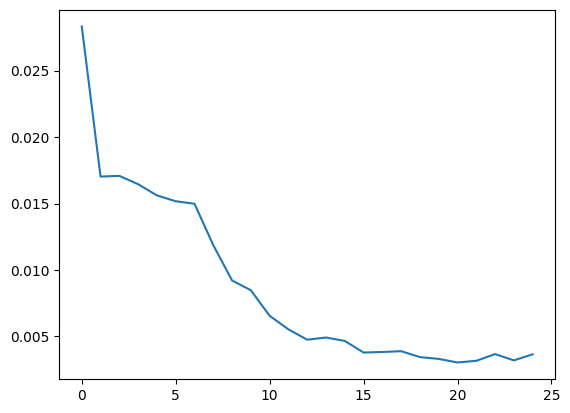

In [248]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test data

In [249]:
first_eval_batch = scaled_train[-12:]

In [250]:
first_eval_batch

array([[1.        ],
       [0.90734524],
       [0.76120514],
       [0.58509584],
       [0.5390997 ],
       [0.68097591],
       [0.82775857],
       [0.89700432],
       [0.69213872],
       [0.58596256],
       [0.63107703],
       [0.84971558]])

In [251]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [252]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 171ms/step


array([[1.090295]], dtype=float32)

In [253]:
scaled_test[0]

array([0.95152075])

In [254]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [255]:
current_batch.shape

(1, 12, 1)

In [256]:
current_batch

array([[[1.        ],
        [0.90734524],
        [0.76120514],
        [0.58509584],
        [0.5390997 ],
        [0.68097591],
        [0.82775857],
        [0.89700432],
        [0.69213872],
        [0.58596256],
        [0.63107703],
        [0.84971558]]])

In [257]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.90734524],
        [ 0.76120514],
        [ 0.58509584],
        [ 0.5390997 ],
        [ 0.68097591],
        [ 0.82775857],
        [ 0.89700432],
        [ 0.69213872],
        [ 0.58596256],
        [ 0.63107703],
        [ 0.84971558],
        [99.        ]]])

In [258]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [259]:
test_predictions

[array([1.090295], dtype=float32),
 array([1.0800352], dtype=float32),
 array([0.8693094], dtype=float32),
 array([0.67003584], dtype=float32),
 array([0.61879396], dtype=float32),
 array([0.72644335], dtype=float32),
 array([0.8935144], dtype=float32),
 array([0.9535163], dtype=float32),
 array([0.796049], dtype=float32),
 array([0.6832896], dtype=float32),
 array([0.7399173], dtype=float32),
 array([0.97907835], dtype=float32)]

In [260]:
scaled_test

array([[0.95152075],
       [0.91946941],
       [0.83697623],
       [0.63100231],
       [0.59598717],
       [0.71546056],
       [0.85469426],
       [0.88013061],
       [0.73668035],
       [0.65078752],
       [0.73032437],
       [1.10761073]])

In [261]:
true_predictions = scaler.inverse_transform(test_predictions)

In [262]:
true_predictions

array([[83.70875088],
       [83.29680971],
       [74.8359166 ],
       [66.83484298],
       [64.77742022],
       [69.09967225],
       [75.80777517],
       [78.21692384],
       [71.89442256],
       [67.36699689],
       [69.64066662],
       [79.24327074]])

In [263]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,83.065636
1989-02-01,76.8499,80.869269
1989-03-01,73.5377,72.279029
1989-04-01,65.2676,65.080069
1989-05-01,63.8617,63.676745
1989-06-01,68.6587,68.599506
1989-07-01,74.2491,75.138407
1989-08-01,75.2704,76.825057
1989-09-01,69.5107,71.069358


In [264]:
test['Predictions'] = true_predictions

<ipython-input-264-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [265]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,83.708751
1989-02-01,76.8499,83.296810
1989-03-01,73.5377,74.835917
1989-04-01,65.2676,66.834843
1989-05-01,63.8617,64.777420
1989-06-01,68.6587,69.099672
1989-07-01,74.2491,75.807775
1989-08-01,75.2704,78.216924
1989-09-01,69.5107,71.894423


<Axes: xlabel='DATE'>

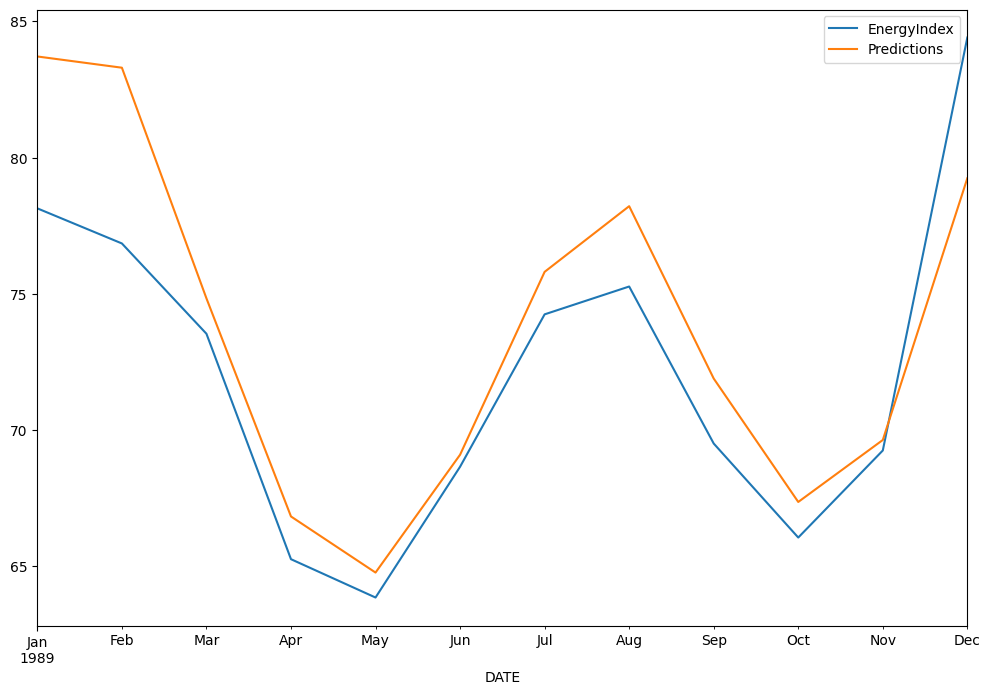

In [266]:
test.plot(figsize=(12,8))

In [267]:
x1 = test['EnergyIndex'].to_numpy()

In [268]:
x2 = test['Predictions'].to_numpy()

In [269]:
mean_squared_error(x1,x2)

10.255166612897556

In [270]:
np.sqrt(mean_squared_error(x1,x2))

3.2023689064343532

### Layer 150

In [271]:
K.clear_session()

In [272]:
del model

In [273]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [274]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [275]:
# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25


<ipython-input-275-b02c32e9fbc0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=25)


216/216 [==============================] - 4s 5ms/step - loss: 0.0302
Epoch 2/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0167
Epoch 3/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0157
Epoch 4/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0148
Epoch 5/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0112
Epoch 6/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0096
Epoch 7/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 8/25
216/216 [==============================] - 1s 5ms/step - loss: 0.0079
Epoch 9/25
216/216 [==============================] - 2s 7ms/step - loss: 0.0064
Epoch 10/25
216/216 [==============================] - 2s 9ms/step - loss: 0.0056
Epoch 11/25
216/216 [==============================] - 2s 9ms/step - loss: 0.0052
Epoch 12/25
216/216 [==============================] - 2s 7ms/step - loss: 0.0040
Epoch 13/25
216/216 [===============

In [276]:
model.history.history.keys()

dict_keys(['loss'])

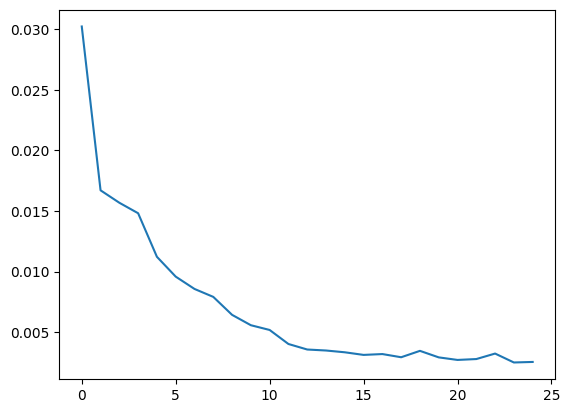

In [277]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

### Evaluate on Test data

In [278]:
first_eval_batch = scaled_train[-12:]

In [279]:
first_eval_batch

array([[1.        ],
       [0.90734524],
       [0.76120514],
       [0.58509584],
       [0.5390997 ],
       [0.68097591],
       [0.82775857],
       [0.89700432],
       [0.69213872],
       [0.58596256],
       [0.63107703],
       [0.84971558]])

In [280]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [281]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 276ms/step


array([[1.0705879]], dtype=float32)

In [282]:
scaled_test[0]

array([0.95152075])

In [283]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [284]:
current_batch.shape

(1, 12, 1)

In [285]:
current_batch

array([[[1.        ],
        [0.90734524],
        [0.76120514],
        [0.58509584],
        [0.5390997 ],
        [0.68097591],
        [0.82775857],
        [0.89700432],
        [0.69213872],
        [0.58596256],
        [0.63107703],
        [0.84971558]]])

In [286]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.90734524],
        [ 0.76120514],
        [ 0.58509584],
        [ 0.5390997 ],
        [ 0.68097591],
        [ 0.82775857],
        [ 0.89700432],
        [ 0.69213872],
        [ 0.58596256],
        [ 0.63107703],
        [ 0.84971558],
        [99.        ]]])

In [287]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [288]:
test_predictions

[array([1.0705879], dtype=float32),
 array([1.0742713], dtype=float32),
 array([0.93623763], dtype=float32),
 array([0.7964241], dtype=float32),
 array([0.67600435], dtype=float32),
 array([0.78170145], dtype=float32),
 array([0.9762157], dtype=float32),
 array([1.0105046], dtype=float32),
 array([0.88615954], dtype=float32),
 array([0.7574912], dtype=float32),
 array([0.8310683], dtype=float32),
 array([1.073225], dtype=float32)]

In [289]:
scaled_test

array([[0.95152075],
       [0.91946941],
       [0.83697623],
       [0.63100231],
       [0.59598717],
       [0.71546056],
       [0.85469426],
       [0.88013061],
       [0.73668035],
       [0.65078752],
       [0.73032437],
       [1.10761073]])

In [290]:
true_predictions = scaler.inverse_transform(test_predictions)

In [291]:
true_predictions

array([[82.91748782],
       [83.06538268],
       [77.52316446],
       [71.90948296],
       [67.07448587],
       [71.31835108],
       [79.12833262],
       [80.50507243],
       [75.51246889],
       [70.34627952],
       [73.30048862],
       [83.02337248]])

In [292]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,83.708751
1989-02-01,76.8499,83.296810
1989-03-01,73.5377,74.835917
1989-04-01,65.2676,66.834843
1989-05-01,63.8617,64.777420
1989-06-01,68.6587,69.099672
1989-07-01,74.2491,75.807775
1989-08-01,75.2704,78.216924
1989-09-01,69.5107,71.894423


In [293]:
test['Predictions'] = true_predictions

<ipython-input-293-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [294]:
test

,EnergyIndex,Predictions
DATE,,
1989-01-01,78.1368,82.917488
1989-02-01,76.8499,83.065383
1989-03-01,73.5377,77.523164
1989-04-01,65.2676,71.909483
1989-05-01,63.8617,67.074486
1989-06-01,68.6587,71.318351
1989-07-01,74.2491,79.128333
1989-08-01,75.2704,80.505072
1989-09-01,69.5107,75.512469


<Axes: xlabel='DATE'>

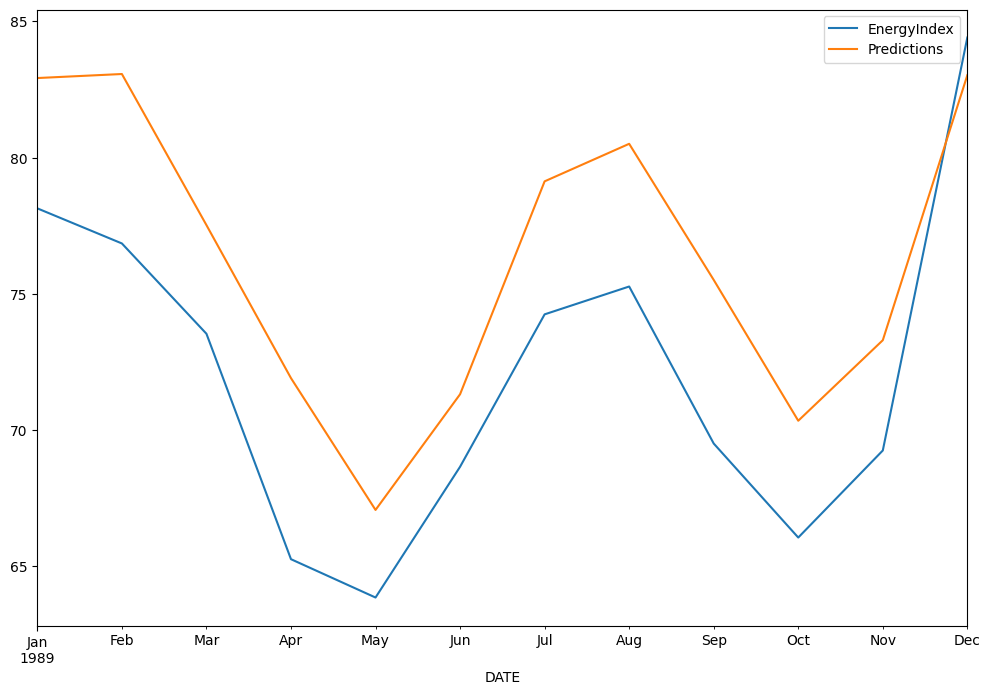

In [295]:
test.plot(figsize=(12,8))

In [296]:
x1 = test['EnergyIndex'].to_numpy()

In [297]:
x2 = test['Predictions'].to_numpy()

In [298]:
mean_squared_error(x1,x2)

21.894543882965053

In [299]:
np.sqrt(mean_squared_error(x1,x2))

4.679160595979267


Dengan Layer 100 didapatkan MSE: 10.2551 dan RMSE: 3.202

Dengan Layer 50 didapatkan MSE: 9.1611 dan RMSE: 3.027

Dengan Layer 150 didapatkan MSE: 21.895 dan RMSE: 4.679

Dalam kasus ini, penambahan neuron menjadi 100 membuat hasil lebih baik, namun penambahan neuron yang teralu banyak mengakibatkan akurasi model turun.

> Indented block

